## Data Preperation

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

In [4]:
# Read the files
transac = pd.read_csv('Dataset/transactions_train.csv')

In [5]:
# Check the shape of dataframe - Only a subset of data from H&M has been used for the project
transac.shape

(235336, 6)

In [6]:
# Convert the transaction t_dat to date format
transac['InvoiceDate'] = pd.to_datetime(transac['t_dat'],format='%Y-%m-%d')
transac=transac[["InvoiceDate", "customer_id", "article_id", "price","sales_channel_id"]].drop_duplicates()

In [7]:
transac.shape

(213685, 5)

In [8]:
# Check the info
transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213685 entries, 0 to 235334
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceDate       213685 non-null  datetime64[ns]
 1   customer_id       213685 non-null  object        
 2   article_id        213685 non-null  int64         
 3   price             213685 non-null  float64       
 4   sales_channel_id  213685 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 9.8+ MB


In [9]:
transac.head(5)

,InvoiceDate,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2


In [10]:
transac['InvoiceDate'].describe()

C:\Users\Sushanth S\AppData\Local\Temp\ipykernel_38232\3603062401.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transac['InvoiceDate'].describe()


count                  213685
unique                    734
top       2019-09-28 00:00:00
freq                     1238
first     2018-09-20 00:00:00
last      2020-09-22 00:00:00
Name: InvoiceDate, dtype: object

### RFM Analysis

In [11]:
# Install the library if required
#!pip install rfm

In [12]:
from rfm import RFM

r = RFM(transac, customer_id='customer_id', transaction_date='InvoiceDate', amount='price') 
# Recency frequency and moneytary value table
r.rfm_table

,customer_id,recency,frequency,monetary_value,r,f,m,rfm_score,segment
0,0090c0bb62e94f069ee7892db19d2fb546ff3c7cf7b79d...,9,157,4.017254,5,5,5,555,Champions
1,00ffed0316ae807cb9439799d73cd61fd7f6479a0f9a19...,2,64,1.643576,5,5,5,555,Champions
2,010109a899c4706836f7a96ec878ceb7ea9b0c24693205...,5,255,8.108610,5,5,5,555,Champions
3,01816147c044dd4f40c01507d9ba004c7d4f71e3b1be36...,12,48,1.418169,5,5,5,555,Champions
4,0181270649b443077be674f9981ef929030056a69549c2...,1,114,4.066593,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
9925,0034841f9795e3ff860c4b522c1dbf8e46091a274e0578...,515,1,0.030492,1,1,1,111,Lost
9926,009f9d23cec8687aff0aaff820a096f51d10549a3950b7...,578,2,0.043186,1,1,1,111,Lost
9927,009f62efe89872b2367b774cf57a04c574b79ac528c1a7...,704,1,0.010153,1,1,1,111,Lost
9928,01bb61e74544742ba8db865dd3a7388bd37f85d061586d...,526,1,0.033881,1,1,1,111,Lost


In [13]:
r = RFM(transac, customer_id='customer_id', transaction_date='InvoiceDate', amount='price')

In [14]:
import seaborn as sns 
x = r.segment_table
x.to_csv("C:/Users/Sushanth S/Class Lectures/Marketing/HM-Recommender-System-App-main/Project/Dataset/Segments.csv")

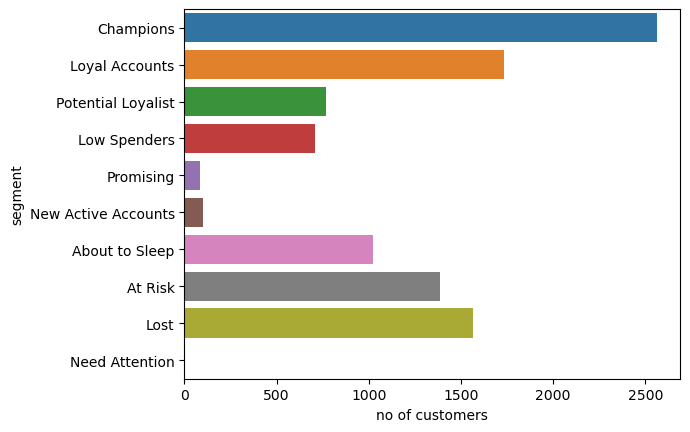

In [15]:
sns.barplot(x= x['no of customers'],y= x.segment)
plt.savefig('plots/RFM_categories.png', dpi=500)

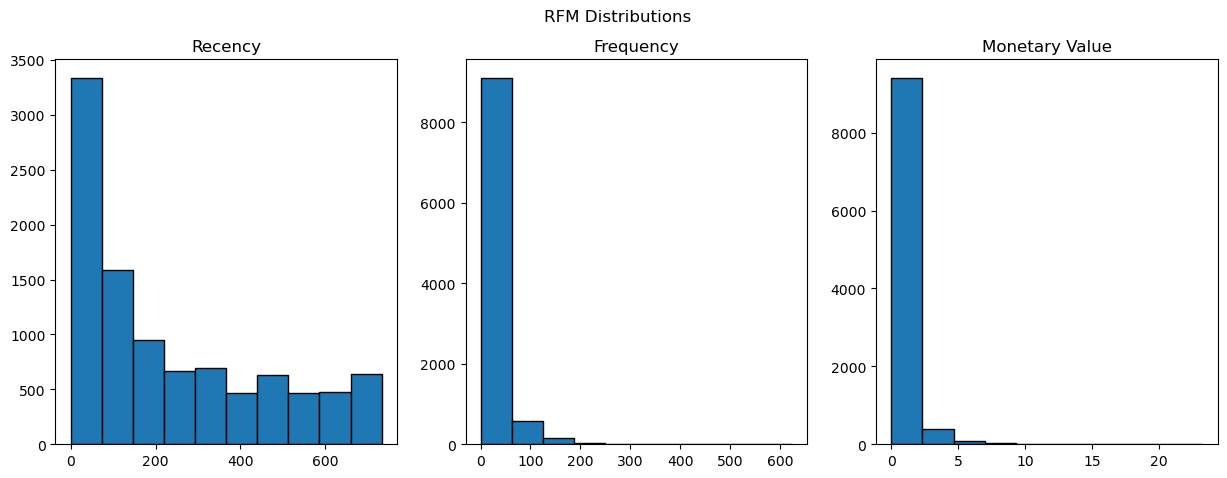

In [129]:
r.plot_rfm_histograms()

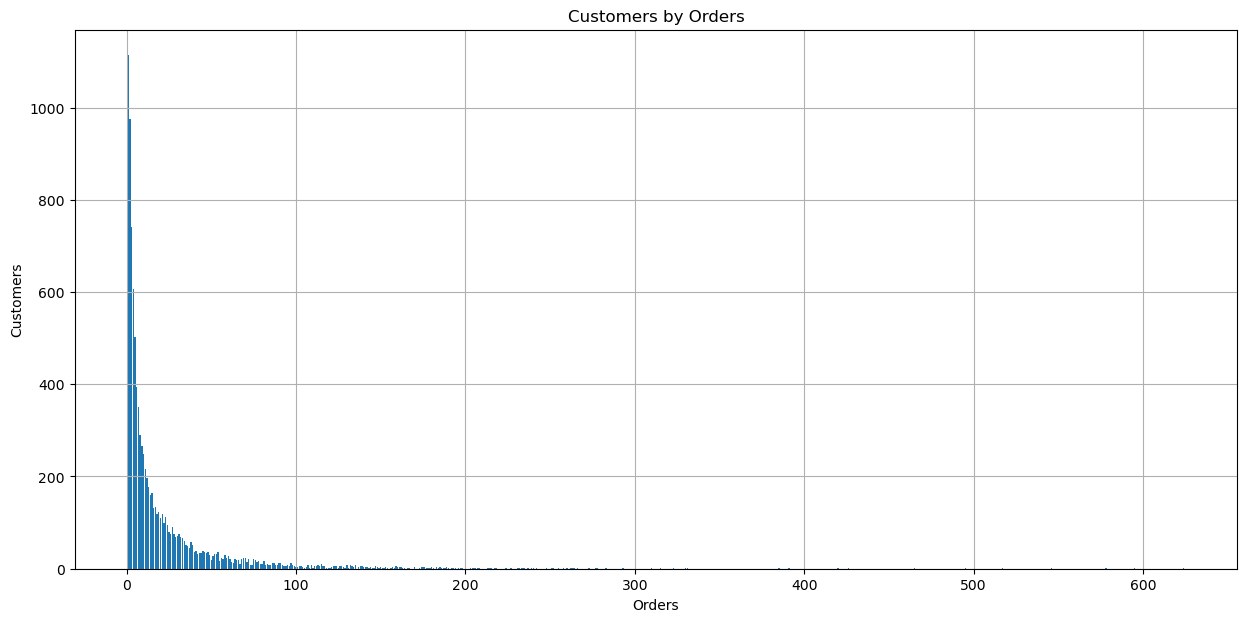

In [130]:
r.plot_rfm_order_distribution()

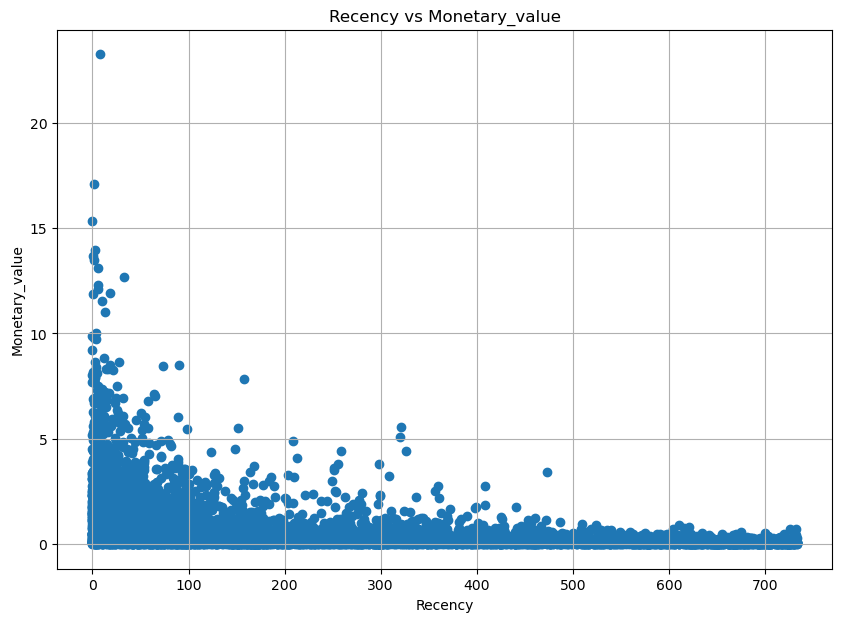

In [131]:
r.plot_versace_plot(column1='recency',column2='monetary_value')

In [132]:
# to find the champions
r.find_customers('Champions')

,customer_id,recency,frequency,monetary_value,r,f,m,rfm_score,segment
0,0090c0bb62e94f069ee7892db19d2fb546ff3c7cf7b79d...,9,157,4.017254,5,5,5,555,Champions
1,00ffed0316ae807cb9439799d73cd61fd7f6479a0f9a19...,2,64,1.643576,5,5,5,555,Champions
2,010109a899c4706836f7a96ec878ceb7ea9b0c24693205...,5,255,8.108610,5,5,5,555,Champions
3,01816147c044dd4f40c01507d9ba004c7d4f71e3b1be36...,12,48,1.418169,5,5,5,555,Champions
4,0181270649b443077be674f9981ef929030056a69549c2...,1,114,4.066593,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
2557,0082baf232b2cdb231eaedc74842f6a8880fead8370566...,90,18,0.339949,4,4,4,444,Champions
2558,002fee17c1325566d34d4441fa411c3b4c8533a65ea5cf...,49,16,0.417831,4,4,4,444,Champions
2559,003043175f4a58a208652e1d57511d2dbfeb3f3e2a43a3...,49,14,0.341288,4,4,4,444,Champions
2560,001a505b9356f58f064f776be43b54664cf842f4b0252a...,54,24,0.388898,4,4,4,444,Champions


In [133]:
x = pd.DataFrame(x)

In [1]:
import plotly.express as px
fig = px.treemap(x, path=[x.segment], values=x['no of customers'])
fig.update_layout(title_text='Distribution of the RFM Segments', title_x=0.5,
                  title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root")
fig.show()

NameError: name 'x' is not defined

## Apply Item based collaborative Filtering

In [135]:
# Data Preperation
df = r.rfm_table

In [136]:
start_date = datetime.datetime(2020,3,1)

# Filter transactions by date
transac["t_dat"] = pd.to_datetime(transac["InvoiceDate"])
transac = transac.loc[transac["t_dat"] >= start_date]

In [137]:
analysis_date=datetime.datetime(2020,9,23)
transac['date']=transac['InvoiceDate']
(analysis_date - transac['InvoiceDate'].max()).days

1

In [145]:
# Merge the RFM data with transaction data
transac=pd.merge(transac,df[["customer_id","segment"]],how='inner',on='customer_id')
training_segment = ['Champions', 'Potential Loyalists', 'New Active Accounts','Promising','Loyal Accounts']
transac = transac[transac['segment'].isin(training_segment)]

In [146]:
# Check the data
transac.head()

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,segment_x,segment_y,segment_x,segment_y,segment
0,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808001,0.067779661016,2,2020-04-01,2020-04-01,Champions,Champions,Champions,Champions,Champions
1,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808007,0.067779661016,2,2020-04-01,2020-04-01,Champions,Champions,Champions,Champions,Champions
2,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,858883002,0.030491525423,2,2020-04-18,2020-04-18,Champions,Champions,Champions,Champions,Champions
3,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,851400006,0.059305084745,2,2020-04-18,2020-04-18,Champions,Champions,Champions,Champions,Champions
4,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,750424014,0.042355932203,2,2020-04-18,2020-04-18,Champions,Champions,Champions,Champions,Champions


In [147]:
transac=transac.drop(['segment','segment_x','segment_y'], axis=1)

In [148]:
# Filter transactions by number of an article has been bought
article_bought_count = transac[['article_id', 'InvoiceDate']].groupby('article_id').count().reset_index().rename(columns={'InvoiceDate': 'count'})
most_bought_articles = article_bought_count[article_bought_count['count']>10]['article_id'].values
transac = transac[transac['article_id'].isin(most_bought_articles)]
transac["bought"]=1

In [149]:
transac.head()

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought
5,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,870304002,0.033881355932,2,2020-04-18,2020-04-18,1
12,2020-04-11,00007d2de826758b65a93dd24ce629ed66842531df6699...,160442010,0.010830508474,2,2020-04-11,2020-04-11,1
14,2020-04-11,00007d2de826758b65a93dd24ce629ed66842531df6699...,372860001,0.010830508474,2,2020-04-11,2020-04-11,1
15,2020-04-11,00007d2de826758b65a93dd24ce629ed66842531df6699...,160442007,0.010830508474,2,2020-04-11,2020-04-11,1
31,2020-08-06,0008968c0d451dbc5a9968da03196fe20051965edde741...,857812002,0.016932203389,2,2020-08-06,2020-08-06,1


In [150]:
# Check shape of output
transac.shape

(16818, 8)

In [151]:
opts = dict(method='zip', archive_name='out.csv')

transac.to_csv('Dataset/out.zip', index=False, compression = opts) 

### Creating Data for Content based filtering

In [96]:
# Laoding articles data
articles = pd.read_csv('Dataset/articles.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [97]:
# we drop the columns which we do not want to keep in our meta data

articles.drop(columns=['product_code', 'prod_name', 'product_type_no', 'product_type_name',
                       'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code',
                       'colour_group_name','perceived_colour_value_id', 'perceived_colour_value_name',
                       'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 
                       'department_name', 'index_code', 'index_name', 'index_group_no', 'section_no', 
                       'section_name', 'garment_group_no', 'detail_desc'], inplace= True)

In [98]:
# check for nulls 
articles.isnull().sum()

article_id            0
product_group_name    0
index_group_name      0
garment_group_name    0
dtype: int64

In [99]:
# Encoding the categorical variable
articles = pd.get_dummies(articles, columns=['product_group_name', 'index_group_name', 'garment_group_name'])
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 46 columns):
 #   Column                                            Non-Null Count   Dtype
---  ------                                            --------------   -----
 0   article_id                                        105542 non-null  int64
 1   product_group_name_Accessories                    105542 non-null  uint8
 2   product_group_name_Bags                           105542 non-null  uint8
 3   product_group_name_Cosmetic                       105542 non-null  uint8
 4   product_group_name_Fun                            105542 non-null  uint8
 5   product_group_name_Furniture                      105542 non-null  uint8
 6   product_group_name_Garment Full body              105542 non-null  uint8
 7   product_group_name_Garment Lower body             105542 non-null  uint8
 8   product_group_name_Garment Upper body             105542 non-null  uint8
 9   product_group_name_Garment

In [101]:
compression_articles = dict(method='zip', archive_name='out_content.csv')

articles.to_csv('Dataset/out_content.zip', index=False, compression=compression_articles) 